In [51]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

x=pd.read_csv("/content/train.csv")
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
counts=x["Survived"].value_counts()
counts

,count
Survived,
0,549
1,342


Survived
0    549
1    342
Name: count, dtype: int64


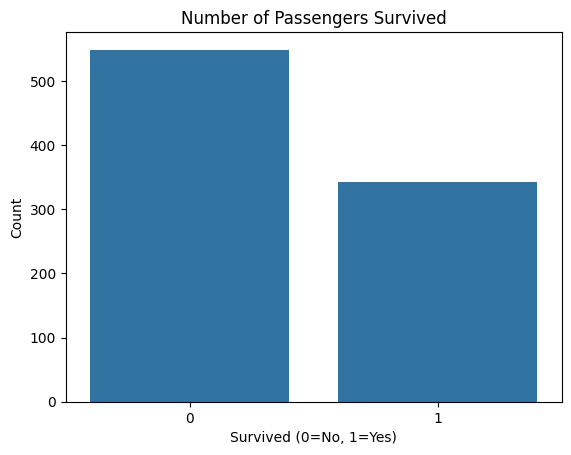

In [53]:
print(counts)
sns.countplot(x='Survived', data=x)
plt.title('Number of Passengers Survived')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

Sex
female    233
male      109
Name: count, dtype: int64


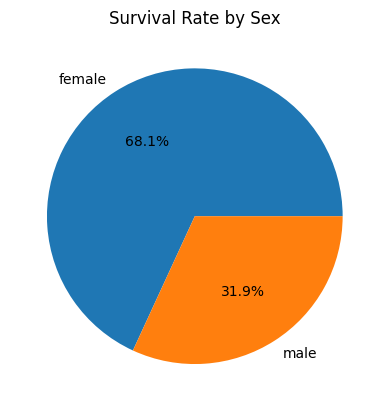

In [54]:
survived_by_sex = survived_passengers['Sex'].value_counts()
print(survived_by_sex)
plt.pie(survived_by_sex, labels=survived_by_sex.index, autopct='%1.1f%%')
plt.title('Survival Rate by Sex')
plt.show()

In [55]:
survived_by_class = x.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)
print(survived_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


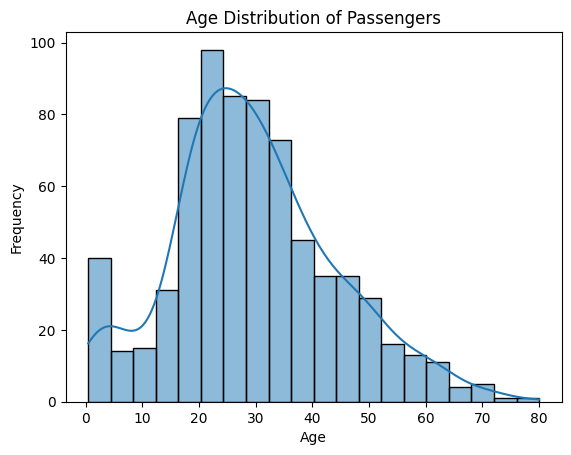


Average age of survivors vs non-survivors:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


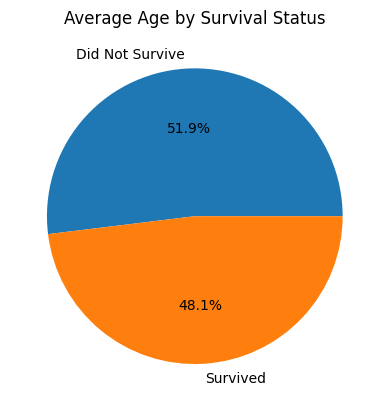

In [56]:

sns.histplot(x['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

avg_age_survived = x.groupby('Survived')['Age'].mean()
print("\nAverage age of survivors vs non-survivors:")
print(avg_age_survived)


plt.pie(avg_age_survived.values, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%')
plt.title('Average Age by Survival Status')
plt.show()

Survival rate for passengers with and without family:
Has_Family
0    0.303538
1    0.505650
Name: Survived, dtype: float64


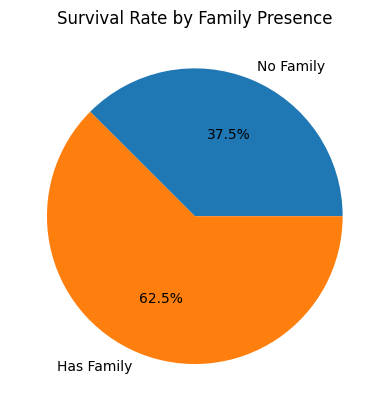

In [57]:
x['Has_Family'] = ((x['SibSp'] > 0) | (x['Parch'] > 0)).astype(int)
survival_by_family = x.groupby('Has_Family')['Survived'].mean()
print("Survival rate for passengers with and without family:")
print(survival_by_family)
plt.pie(survival_by_family.values, labels=['No Family', 'Has Family'], autopct='%1.1f%%')
plt.title('Survival Rate by Family Presence')
plt.show()

In [58]:
average_fare = x['Fare'].mean()
print(f"The average fare is: {average_fare:.2f}")
high_fare_passengers = x[x['Fare'] > average_fare]
survival_rate_high_fare = high_fare_passengers['Survived'].mean()
print(f"\nSurvival rate for passengers who paid more than the average fare: {survival_rate_high_fare:.2f}")

The average fare is: 32.20

Survival rate for passengers who paid more than the average fare: 0.60


Survival rate by age group:
Age_Group
child     0.590361
adult     0.366412
senior    0.227273
Name: Survived, dtype: float64


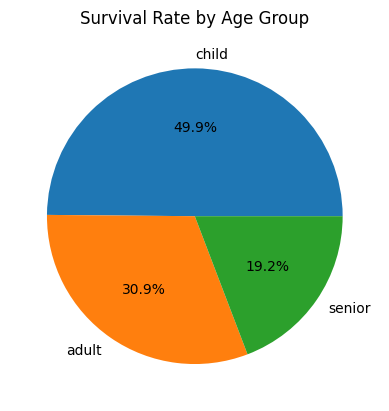

In [59]:
def categorize_age(age):
    if age < 16:
        return 'child'
    elif age > 60:
        return 'senior'
    else:
        return 'adult'
x['Age_Group'] = x['Age'].apply(categorize_age)
survival_by_age_group = x.groupby('Age_Group')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by age group:")
print(survival_by_age_group)
plt.pie(survival_by_age_group.values, labels=survival_by_age_group.index, autopct='%1.1f%%')
plt.title('Survival Rate by Age Group')
plt.show()

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Has_Family   891 non-null    int64  
 13  Age_Group    891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [61]:
print(x.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Family       0
Age_Group        0
dtype: int64


In [62]:
x_cleaned = x.drop('Cabin', axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Has_Family   891 non-null    int64  
 13  Age_Group    891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [63]:
x['Age'].fillna(x['Age'].mean(), inplace=True)
x.drop('Cabin', axis=1, inplace=True)
x['Embarked'].fillna(x['Embarked'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(x.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Family     0
Age_Group      0
dtype: int64


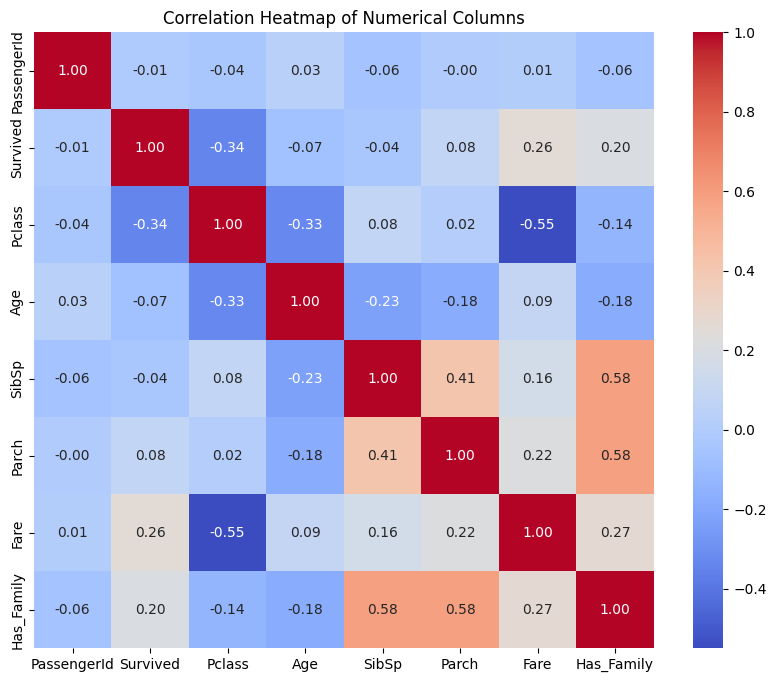

In [64]:
numerical_cols = x.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

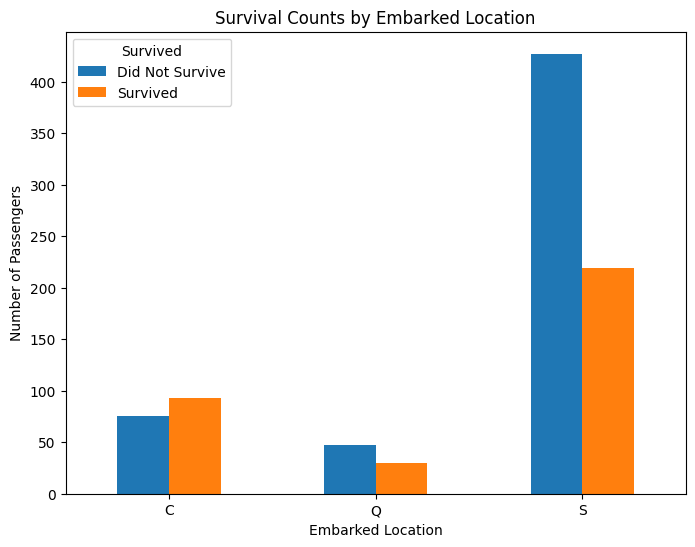


Survival rate by Embarked location:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [65]:
survival_by_embarked = x.groupby('Embarked')['Survived'].value_counts().unstack()
survival_by_embarked.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Survival Counts by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

survival_rate_by_embarked = x.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
print("\nSurvival rate by Embarked location:")
print(survival_rate_by_embarked)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = x[features]
y = x[target]
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=350, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")

Accuracy of the Random Forest Classifier: 0.82


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")

Accuracy of the Random Forest Classifier: 0.81


In [69]:
X_test_first_10 = X_test.head(10)
y_test_first_10 = y_test.head(10)
predictions_first_10 = model.predict(X_test_first_10)
comparison_x = pd.DataFrame({'Actual Survived': y_test_first_10, 'Predicted Survived': predictions_first_10})
display(comparison_x)

,Actual Survived,Predicted Survived
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

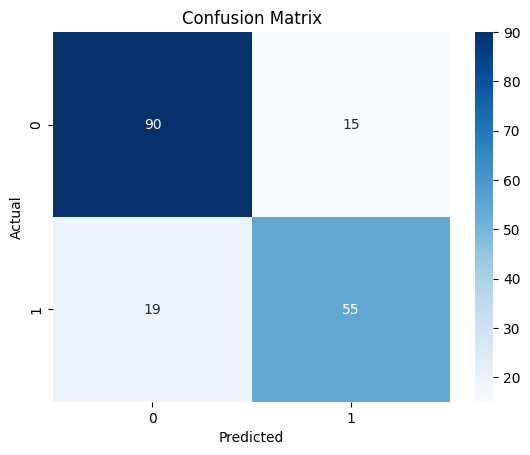

In [71]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
feature_importances = model.named_steps['classifier'].feature_importances_


feature_names = model.named_steps['preprocessor'].get_feature_names_out()


feature_importance_series = pd.Series(feature_importances, index=feature_names)

top_3_features = feature_importance_series.sort_values(ascending=False).head(3)

print("Top 3 most important features:")
display(top_3_features)

Top 3 most important features:


,0
remainder__Fare,0.274021
onehot__Sex_male_True,0.265589
remainder__Age,0.255889


In [74]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
average_accuracy = cv_scores.mean()

print(cv_scores)
print(f"\nAverage accuracy across folds: {average_accuracy:.4f}")

[0.79329609 0.80898876 0.84831461 0.76966292 0.84269663]

Average accuracy across folds: 0.8126


Accuracy scores for different max_depth values:
max_depth=2: Train Accuracy = 0.8090, Test Accuracy = 0.7709
max_depth=5: Train Accuracy = 0.8567, Test Accuracy = 0.8156
max_depth=10: Train Accuracy = 0.9424, Test Accuracy = 0.8324
max_depth=15: Train Accuracy = 0.9747, Test Accuracy = 0.8156
max_depth=20: Train Accuracy = 0.9803, Test Accuracy = 0.8156
max_depth=25: Train Accuracy = 0.9803, Test Accuracy = 0.8156
max_depth=None: Train Accuracy = 0.9803, Test Accuracy = 0.8156


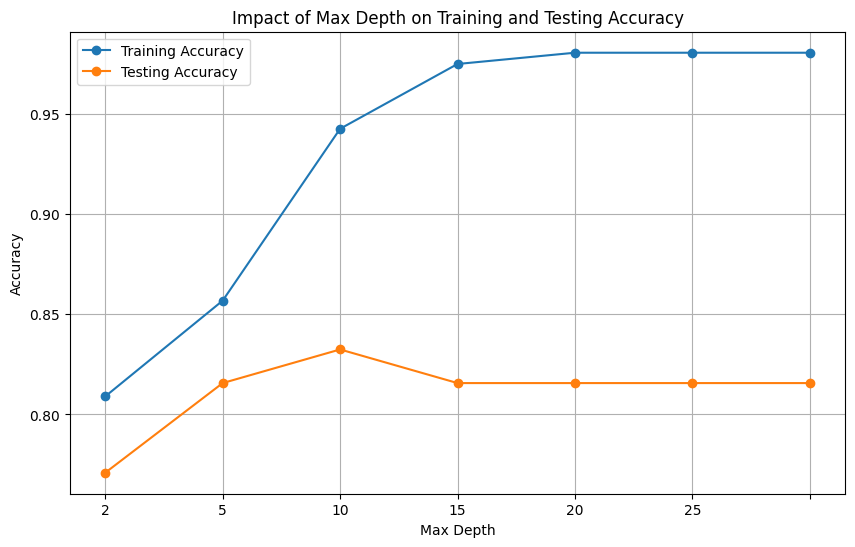

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt



max_depth_values = [2, 5, 10, 15, 20, 25, None]
train_accuracies = []
test_accuracies = []

for depth in max_depth_values:

    model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))])


    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)


    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

print("Accuracy scores for different max_depth values:")
for i, depth in enumerate(max_depth_values):
    print(f"max_depth={depth}: Train Accuracy = {train_accuracies[i]:.4f}, Test Accuracy = {test_accuracies[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(max_depth_values)), train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(range(len(max_depth_values)), test_accuracies, marker='o', linestyle='-', label='Testing Accuracy')
plt.xticks(range(len(max_depth_values)), max_depth_values)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Impact of Max Depth on Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model: {accuracy_dt:.4f}")


print(f"Accuracy of the Random Forest model: {accuracy:.4f}")


if accuracy > accuracy_dt:
    print("\nThe Random Forest model performs better than the Decision Tree model.")
elif accuracy < accuracy_dt:
    print("\nThe Decision Tree model performs better than the Random Forest model.")
else:
    print("\nBoth models have the same accuracy.")

Accuracy of the Decision Tree model: 0.7933
Accuracy of the Random Forest model: 0.8101

The Random Forest model performs better than the Decision Tree model.
